# PART 04. 합성곱 신경망(CNN)

## 01. 합성곱 신경망

- CNN: (Convolutional Neural Network)데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 컴퓨터 비전 분야에서 많이 사용된다.
- 예시: 이미지 분류, 객체 탐지, 스타일 전이

- 이미지 분류
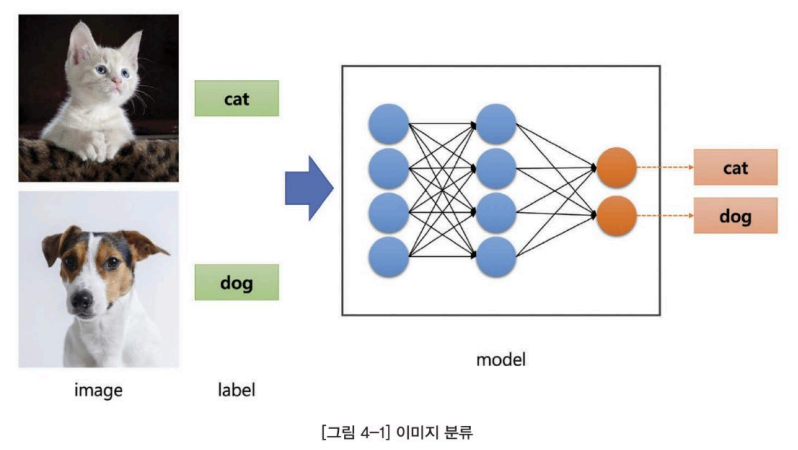

- 객체 탐지
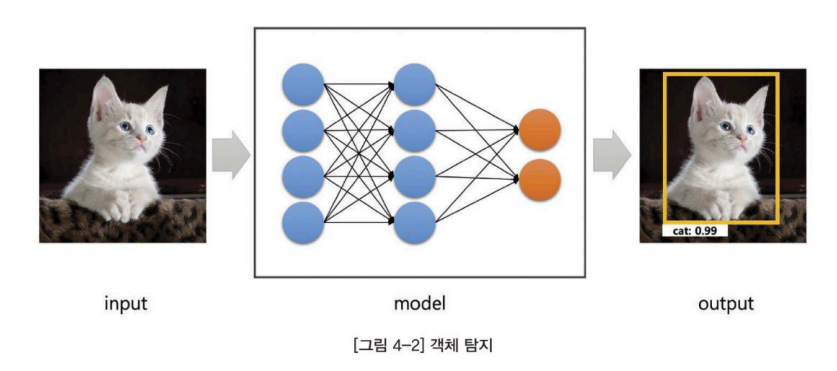

### 1-1 이미지 표현

- 흑백이미지: 0~255 사이의 숫자로 픽셀의 화소 값을 나타냄
- 컬러이미지: R, G, B 채널로 구성된 3장의 이미지를 겹쳐서 표현

### 1-2 합성곱(Convolution)
- 정방형 크기를 가지는 커널을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법
- 특성
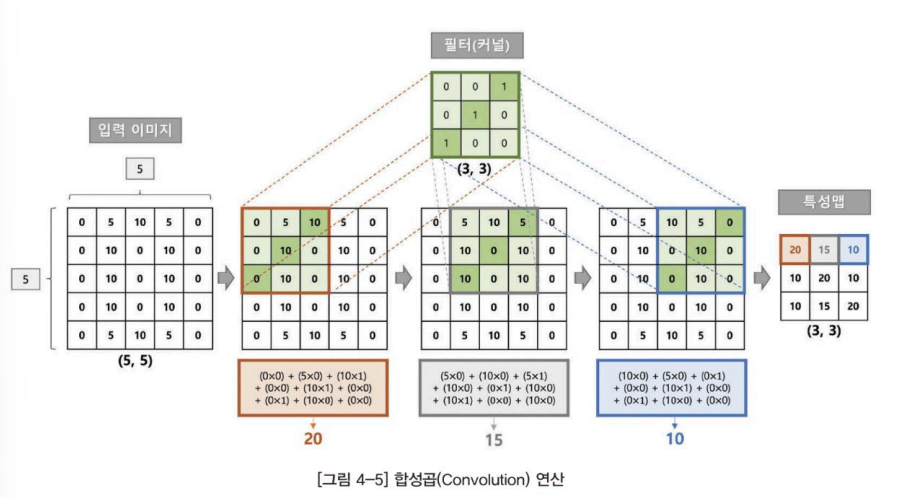

### 1-3 채널(channel)
- 채널: 입력 이미지를 구성하는 2차원 배열의 개수(흑백이미지:1, 컬러이미지: 3)
- 3 x 3 x 입력 채널 수 x 출력 필터 수 = 해당 층에서 업데이트할 가중치의 그레디언트

### 1-4 스트라이드(stride)
- 커널이 이동하는 간격

### 1-5 패딩(padding)
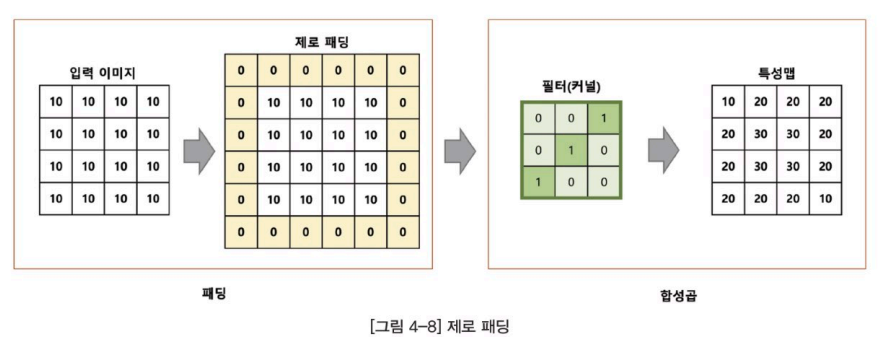

### 1-6 특성맵(feature map) 사이즈
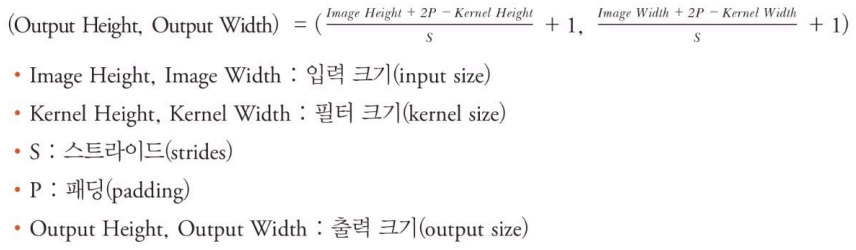

### 1-7 풀링(pooling)
- 풀링: 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
- 과대적합 방지, 연상량 감소
1. 최대 풀링(max pooling)
2. 평균 풀링(average pooling)

## 02. 간단한 모델 생성

### 2-1 데이터 로드 및 전처리

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


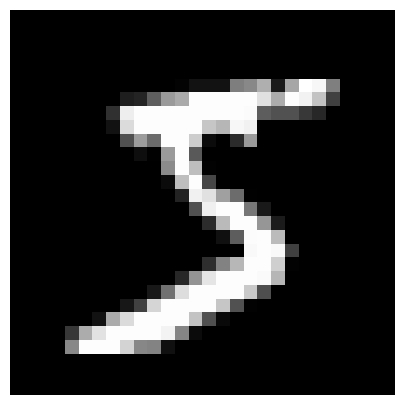

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [4]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [6]:
# CNN 모델에 주입하기 위해서 색생에 나타내는 채널을 추가
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape,x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 2-2 Sequential API로 모델 생성 및 학습

In [7]:
# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32, (3,3),activation='relu',
                           input_shape=(28,28,1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0867 - accuracy: 0.9747 - val_loss: 0.0670 - val_accuracy: 0.9801
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0626 - accuracy: 0.9816 - val_loss: 0.0650 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0511 - accuracy: 0.9841 - val_loss: 0.0552 - val_accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.0500 - val_accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.0624 - val_accuracy: 0.9801
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0503 - val_accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0519 -

In [10]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0532 - accuracy: 0.9850


[0.053177326917648315, 0.9850000143051147]

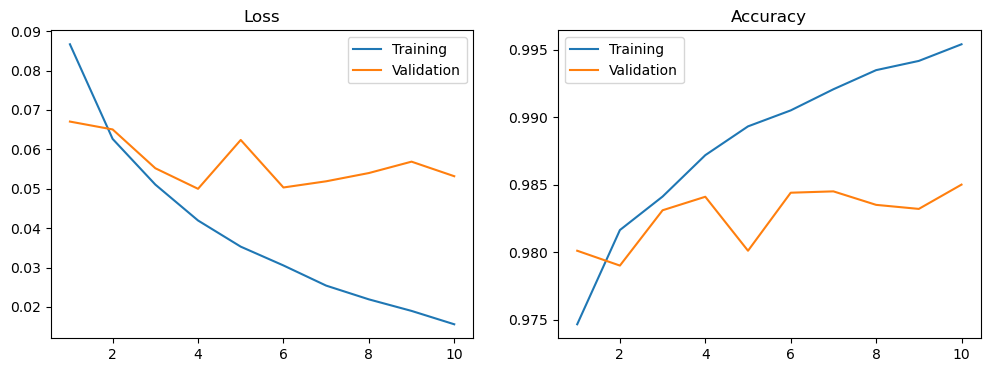

In [11]:
def plot_loss_acc(history, epoch):

  loss, val_loss = history.history['loss'], history.history['val_loss']
  acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

  fig, axes = plt.subplots(1,2,figsize=(12,4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), acc, label='Training')
  axes[1].plot(range(1, epoch+1), val_acc, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

### 2-3 모델 구조 파악
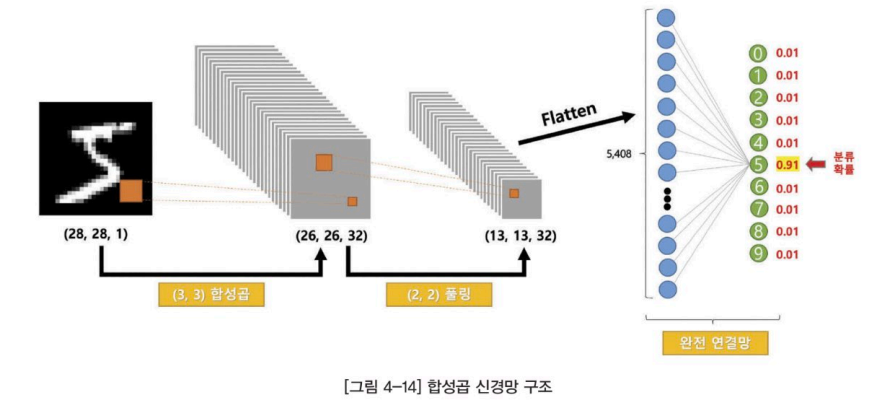

In [12]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [14]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [15]:
# 레이어
model.layers

In [16]:
# 첫 번째 레이어 선택
model.layers[0]

In [17]:
# 첫 번째 레이터 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
# 첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [19]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.48391378, -0.04790663, -0.76086956,  0.3912884 ,
           -0.15049487,  0.05298967, -0.4210213 ,  0.45061436,
           -0.5583336 ,  0.07450724, -0.00847612,  0.249709  ,
            0.42903796,  0.48146054,  0.35058442,  0.42264965,
           -0.9248265 ,  0.2772865 ,  0.46631962, -0.49219465,
           -1.3186924 ,  0.67686933,  0.4287685 , -0.08161877,
           -0.22746176, -0.26776567, -0.71667856,  0.04297057,
           -0.91857535, -1.3500601 , -0.54277277, -0.23477997]],
 
         [[-0.32216534,  0.2618966 ,  0.10914733,  0.31373596,
           -0.69314474,  0.2371387 , -0.5957874 ,  0.4424239 ,
           -0.158013  ,  0.22356208, -0.05166902,  0.356243  ,
            0.07152034,  0.5850088 ,  0.2682806 ,  0.12641141,
           -0.9806964 ,  0.14314505, -0.48809588,  0.3893721 ,
           -0.4616849 ,  0.1205815 , -0.33077702,  0.6053346 ,
            0.18090393,  0.24397117, -0.13

In [20]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.48391378, -0.04790663, -0.76086956,  0.3912884 ,
          -0.15049487,  0.05298967, -0.4210213 ,  0.45061436,
          -0.5583336 ,  0.07450724, -0.00847612,  0.249709  ,
           0.42903796,  0.48146054,  0.35058442,  0.42264965,
          -0.9248265 ,  0.2772865 ,  0.46631962, -0.49219465,
          -1.3186924 ,  0.67686933,  0.4287685 , -0.08161877,
          -0.22746176, -0.26776567, -0.71667856,  0.04297057,
          -0.91857535, -1.3500601 , -0.54277277, -0.23477997]],

        [[-0.32216534,  0.2618966 ,  0.10914733,  0.31373596,
          -0.69314474,  0.2371387 , -0.5957874 ,  0.4424239 ,
          -0.158013  ,  0.22356208, -0.05166902,  0.356243  ,
           0.07152034,  0.5850088 ,  0.2682806 ,  0.12641141,
          -0.9806964 ,  0.14314505, -0.48809588,  0.3893721 ,
          -0.4616849 ,  0.1205815 , -0.33077702,  0.6053346 ,
           0.18090393,  0.24397117, -0.1373723 ,  0.528661

In [21]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.01145798, -0.21504244, -0.12827215, -0.2780313 , -0.0686676 ,
       -0.27041498, -0.08046554, -0.02845716, -0.32032138, -0.06665441,
       -0.08850271, -0.15939118, -0.21693341, -0.02453429, -0.37106895,
       -0.3188326 , -0.00775581, -0.26465774, -0.37393874, -0.12045192,
       -0.01315824,  0.09604209, -0.30279958, -0.0067573 , -0.02975548,
       -0.1704103 , -0.18225077, -0.36666077, -0.10368359,  0.13701434,
       -0.06627189, -0.18878101], dtype=float32)>

In [22]:
# 레이러 이름 사용하여 레이어 선택
model.get_layer('conv')

In [23]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 154ms/step


2

In [24]:
# 첫 번째 레리어(conv) 출력층
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

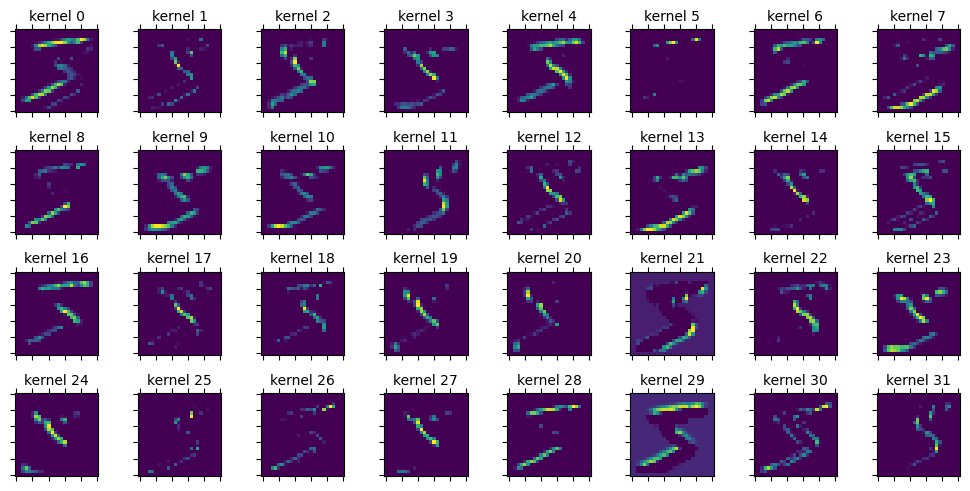

In [25]:
# Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [26]:
# 두 번째 레이어(pool) 출력층
pooling_acitvation = activations[1]
pooling_acitvation.shape

(1, 13, 13, 32)

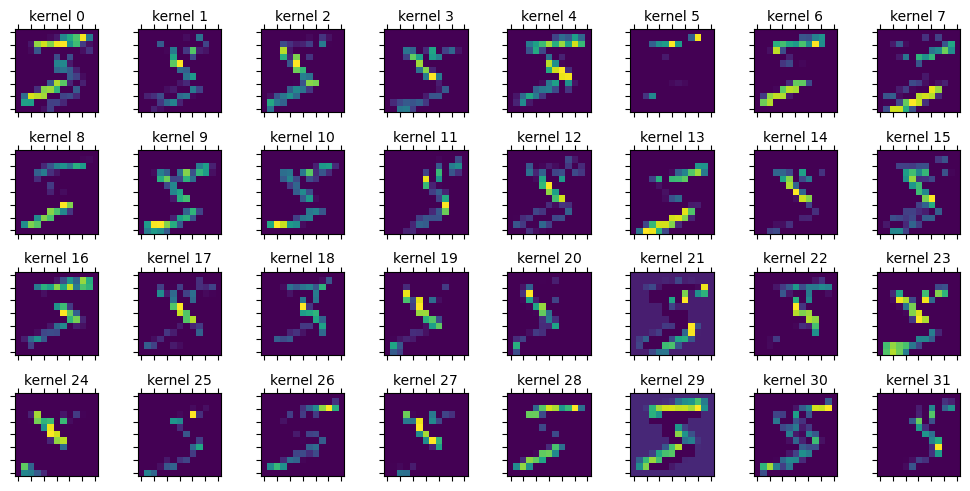

In [27]:
# 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_acitvation[0,:,:,i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## 03. 복잡한 모델 생성

### 3-1 데이터셋 준비

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# 새로운 출력 값 배열 생성(홀수 : 1, 짝수 : 0)
y_train_odd = []
for y in y_train:
  if y%2 == 0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [4]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [5]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
  if y%2 == 0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [6]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 3-2 Functional API로 다중 입력, 다중 출력 레이어 생성

In [7]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28,28,1))

conv = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                              

In [37]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


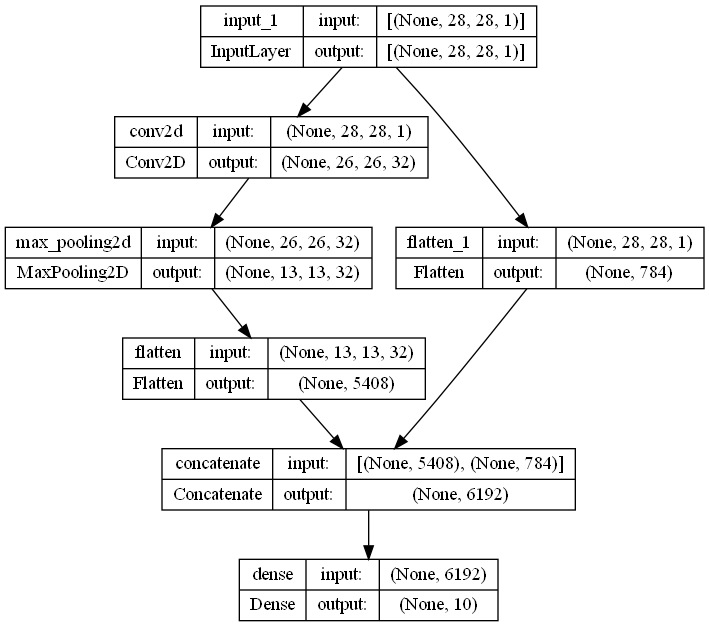

In [8]:
# 모델 구조 출력 및 이미지 파일로 저장
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [9]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1980 - accuracy: 0.9425 - val_loss: 0.0829 - val_accuracy: 0.9751
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0750 - accuracy: 0.9781 - val_loss: 0.0677 - val_accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0587 - accuracy: 0.9825 - val_loss: 0.0645 - val_accuracy: 0.9793
Epoch 4/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0532 - val_accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0399 - accuracy: 0.9873 - val_loss: 0.0579 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0335 - accuracy: 0.9897 - val_loss: 0.0537 - val_accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0589 -

### 3-3 다중 출력 분류 모델
- 0~9까지 숫자를 맞추는 분류 문제와, 홀수짝수를 맞추는 분류 문제를 동시에 풀어내는 모델
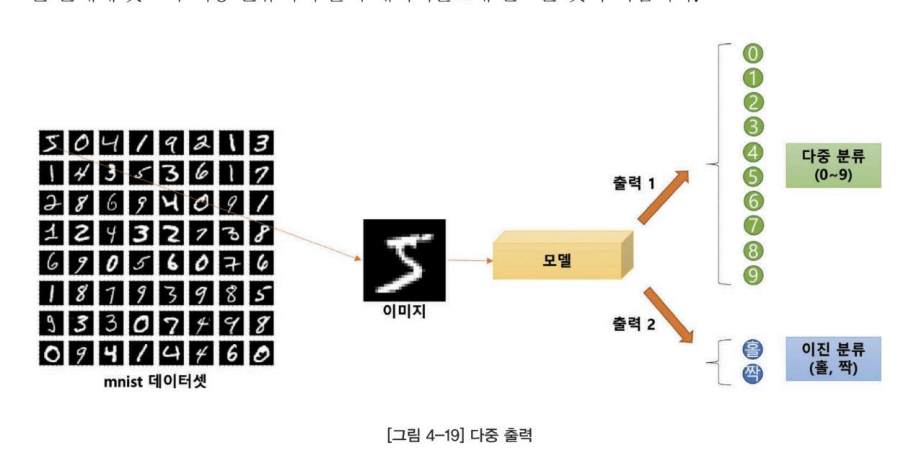

In [29]:
# Functional API를 사용해 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs=tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs=tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model=tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [11]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


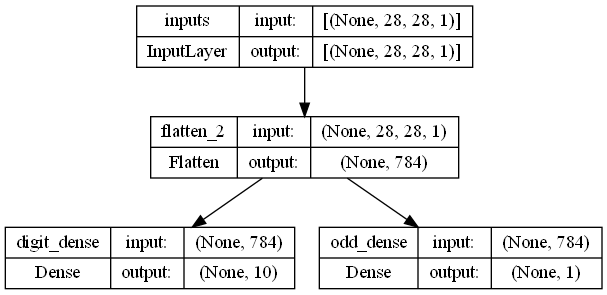

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [14]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy','odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5},
              # loss=1.0*sparse_categotical_crossentropy + 0.5*binary_crossentropy
              metrics = ['accuracy'])

# 모델 훈련
history = model.fit({'inputs':x_train_in},{'digit_dense':y_train,'odd_dense':y_train_odd},
                    validation_data=({'inputs':x_valid_in},{'digit_dense':y_valid,
                    'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6293 - digit_dense_loss: 0.4679 - odd_dense_loss: 0.3228 - digit_dense_accuracy: 0.8774 - odd_dense_accuracy: 0.8659 - val_loss: 0.4455 - val_digit_dense_loss: 0.3073 - val_odd_dense_loss: 0.2764 - val_digit_dense_accuracy: 0.9131 - val_odd_dense_accuracy: 0.8901
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4392 - digit_dense_loss: 0.3036 - odd_dense_loss: 0.2712 - digit_dense_accuracy: 0.9146 - odd_dense_accuracy: 0.8910 - val_loss: 0.4138 - val_digit_dense_loss: 0.2815 - val_odd_dense_loss: 0.2646 - val_digit_dense_accuracy: 0.9193 - val_odd_dense_accuracy: 0.8950
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4141 - digit_dense_loss: 0.2829 - odd_dense_loss: 0.2624 - digit_dense_accuracy: 0.9219 - odd_dense_accuracy: 0.8962 - val_loss: 0.4030 - val_digit_dense_loss: 0.2735 - val_odd_dense_loss: 0.2589 - val_digit_dense_accuracy: 0.9247 - val_o

In [15]:
# 모델 성능
model.evaluate({'inputs':x_valid_in},{'digit_dense':y_valid,'odd_dense':y_valid_odd})

313/313 [==============================] - 1s 2ms/step - loss: 0.3949 - digit_dense_loss: 0.2659 - odd_dense_loss: 0.2581 - digit_dense_accuracy: 0.9268 - odd_dense_accuracy: 0.9010


[0.39491888880729675,
 0.26585957407951355,
 0.2581188678741455,
 0.926800012588501,
 0.9010000228881836]

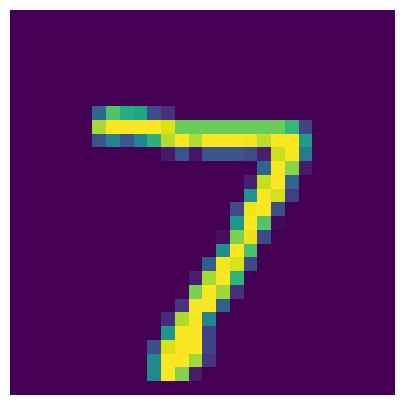

In [16]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [17]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 1s 1ms/step
[5.4651764e-07 1.6804765e-12 2.0867990e-06 3.8816051e-03 3.3637500e-07
 2.6250629e-05 5.7279602e-12 9.9582446e-01 1.4321809e-05 2.5041876e-04]
[0.9994331]


In [18]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [24]:
# 임계값을 0.5로 지정하고 홀수일 확률이 0.5보다 큰 경우 홀수로 분류하기로 함
odd_labels=(odd_preds>0.5).astype(np.int32).reshape(1, -1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

### 3-4 전이 학습(Transfer Learning)
- 기존에 학습된 모델을 활용해 새로운 모델을 만들어 내는 개념(최종 출력층만 새롭게 추가)
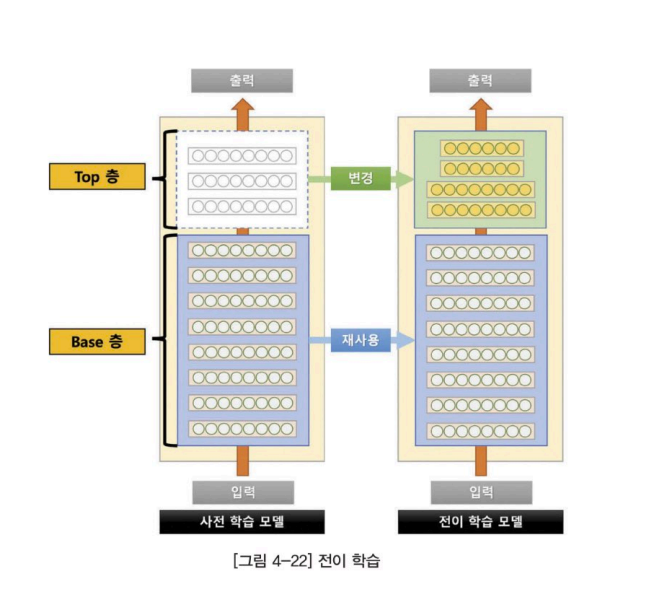

In [31]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


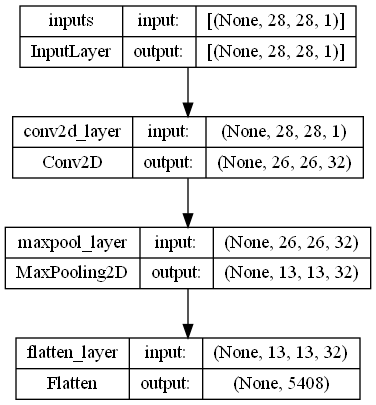

In [33]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [34]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


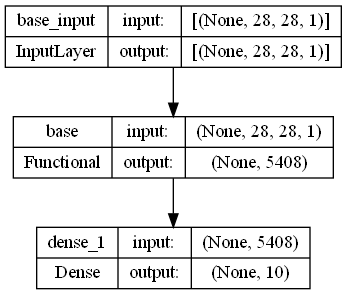

In [37]:
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [38]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2117 - accuracy: 0.9398 - val_loss: 0.0902 - val_accuracy: 0.9715
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0799 - accuracy: 0.9768 - val_loss: 0.0671 - val_accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0600 - accuracy: 0.9822 - val_loss: 0.0624 - val_accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0494 - accuracy: 0.9855 - val_loss: 0.0538 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0416 - accuracy: 0.9874 - val_loss: 0.0532 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0353 - accuracy: 0.9895 - val_loss: 0.0518 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0299 - accuracy: 0.9915 - val_loss: 0.0531 -

In [39]:
# 베이스 모델의 가중치 고정(Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input,
                                          outputs=base_model_output,
                                          name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [40]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input,
                                           outputs=dense_output)
digit_model_frozen.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [42]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


In [43]:
# Functional API 적용
dense_output2=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2=tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [44]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1388 - accuracy: 0.9644 - val_loss: 0.0667 - val_accuracy: 0.9805
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0565 - accuracy: 0.9835 - val_loss: 0.0539 - val_accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0425 - accuracy: 0.9878 - val_loss: 0.0517 - val_accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0337 - accuracy: 0.9902 - val_loss: 0.0511 - val_accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.0495 - val_accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0235 - accuracy: 0.9931 - val_loss: 0.0503 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0197 - accuracy: 0.9946 - val_loss: 0.0506 - val_ac